In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# set seed
#np.random.seed(210187)

global values
values = []

global errs, band, exp
errs = False
band = False
exp  = False

def roll(size=1, rig=None):
    vals = []
    for i in range(size):
        val = np.random.randint(1,7)
        if rig is not None and rig>=1 and rig<=6:
            rigProb = np.random.randint(1,7)
            if rigProb==1:
                val = rig
        vals.append(val)
    global values        
    values += vals
    
def clear():
    global values
    values = []
    
def add(val):
    global values
    if type(val)!=str:
        return
    if val.startswith(','):
        val = val[1:]
    if val.endswith(','):
        val = val[:-1]
    try:
        ival = int(val)
        values.append(ival)
    except:
        try:
            lvals = [ int(v) for v in val.split(',') ]
            values += lvals
        except:
            print(f'WARNING: {val} is not of the right format. Skipping',end='\r',flush=True)
            return
                
def plot(ax=None):
    global values, errs, band, exp
    ax = ax or plt.gca()
    ax.clear()
    
    
    expVal = len(values)/6.
    x = np.linspace(0.5,6.5,4)
    
    # uncert band
    if band:
        ax.fill_between(x, np.full_like(x,expVal-expVal**0.5), np.full_like(x,expVal+expVal**0.5), alpha=0.5, color='0.5',zorder=0)
    # expected line
    if exp:
        ax.plot(x, np.full_like(x,expVal), 'r--',zorder=20)
    # histogram
    nh, xe, _ = ax.hist(values, range=(0.5,6.5), bins=6, rwidth=0.8, align='mid',zorder=10)
    # histogram points
    if errs:
        cx = 0.5*(xe[1:]+xe[:-1])
        ax.errorbar(cx,nh,nh**0.5,fmt='ko', capsize=4,zorder=30)
    
    # styling
    ax.set_xlim(0.5,6.5)
    ax.set_xticks(list(range(1,7)))
    ax.set_ylabel('Number of Rolls')
    ax.set_xlabel('Dice outcome')
    ax.text(0.5,1,f'Total Entries: {len(values)}',ha='center',va='bottom',transform=ax.transAxes)
    ylims = ax.get_ylim()
    ax.set_ylim(0,max(1,np.ceil(ylims[1])))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    


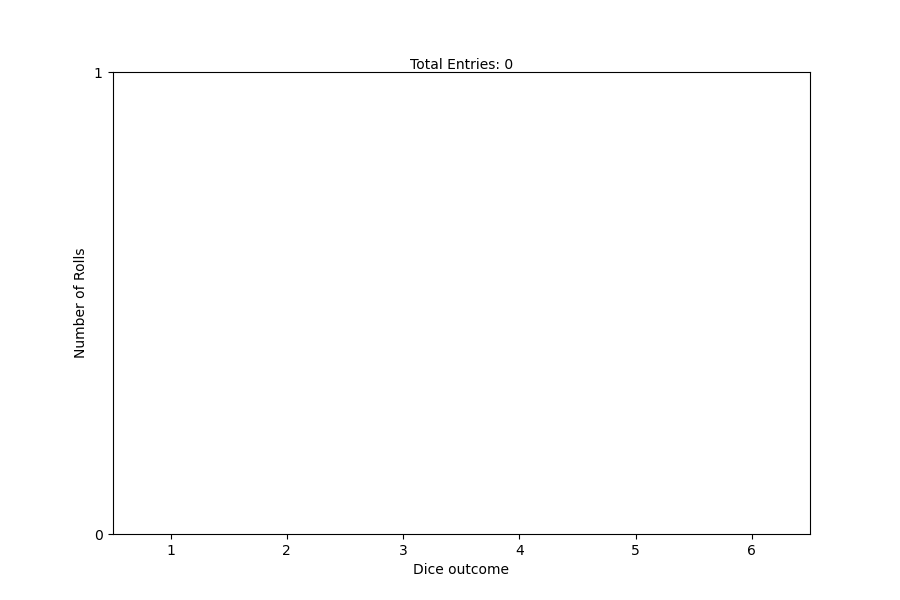

In [2]:
fig, ax = plt.subplots(figsize=(9,6))
fig.canvas.header_visible = False
fig.canvas.toolbar_visible = False
fig.canvas.footer_visible = False
#fig.tight_layout()
plot()


## WIDGETS ##

w_entvals = widgets.Combobox(
    placeholder='enter dice values',
    description='Input',
    continuous_update=False,
    interact_manual=True)


w_rand_n  = widgets.IntText(
    value=10,
    description='Random Fill',
    continuous_update=False,
    interact_manual=True)

w_rigval = widgets.Dropdown(
    options=[('None',None)]+[ (f'Rig {a}',a) for a in range(1,7) ],
    value=None,
    description='Options',
    continous_update=False
)

w_clear_btn = widgets.Button(
    description='Reset'
)

w_fill_btn = widgets.Button(
    description='Run'
)

w_errs = widgets.Checkbox(
    value=False,
    description='Error Bars',
    disabled=False,
    indent=False
)

w_band = widgets.Checkbox(
    value=False,
    description='Error Band',
    disabled=False,
    indent=False
)

w_exp = widgets.Checkbox(
    value=False,
    description='Expectation Line',
    disabled=False,
    indent=False
)

### Layout Widgets ###
w_box_opts = widgets.VBox( [w_entvals, w_rand_n, w_rigval], box_style='info' )
w_box_chks = widgets.VBox( [w_errs, w_band, w_exp], box_style='success' )
w_box_buts = widgets.VBox( [w_clear_btn, w_fill_btn] )
w_box      = widgets.HBox( [w_box_opts, w_box_chks, w_box_buts])
display(w_box)

        
def update(changes=None):
    global errs, band, exp
    errs = w_errs.value
    band = w_band.value
    exp  = w_exp.value
    plot(ax)

def update_w_adds(changes):
    add(changes.new)
    update()

def update_w_rolls(changes):
    roll(w_rand_n.value,w_rigval.value)
    update()
    
def reset(changes):
    w_rigval.value = None
    clear()
    update()

w_entvals.observe(update_w_adds,'value')
w_rand_n.observe(update_w_rolls,'value')
w_fill_btn.on_click(update_w_rolls)
w_clear_btn.on_click(reset)
w_errs.observe(update,'value')
w_band.observe(update,'value')
w_exp.observe(update,'value')